# 학생증 학번 인식 프로젝트

## Open CV 및 Tensorflow 활용

## 라이브러리 선언

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 이미지 불러오기

In [2]:
Original_image = cv2.imread("Student ID Card.jpg", cv2.IMREAD_GRAYSCALE)

## 이미지 회전 - 그림판에서 각 꼭지점 위치 찾음

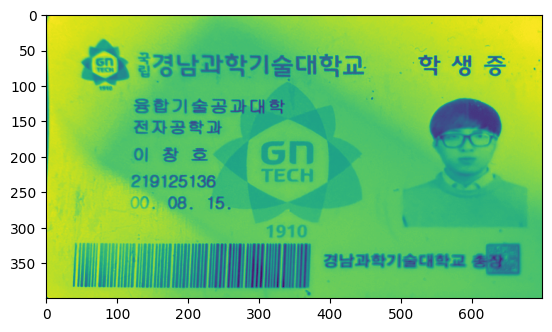

In [3]:
width, height = 700, 400 # 가로 크기 700, 세로 크기 400으로 결과물 출력

src = np.array([[441, 265], [987, 713], [584, 1056], [57, 439]], dtype=np.float32) # Input 4개 지점 (꼭지점 4개의 좌표로 그림판에서 점 찍으면 나옴)
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
# 좌상, 우상, 우하, 좌하 (시계방향으로 4 지점 정의)

matrix = cv2.getPerspectiveTransform(src, dst) #Metrix 얻어 옴
rotated_image = cv2.warpPerspective(Original_image, matrix, (width, height)) # matrix 대로 변환

plt.imshow(rotated_image)

## 학생증을 뚜렷하게 만들기 위한 이진화 작업

### 이진화를 하기 위해 흑백으로 변환

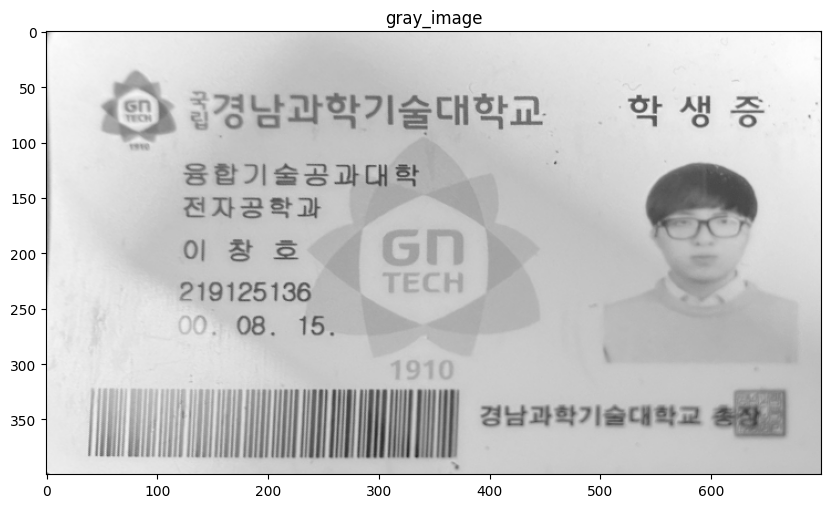

In [4]:
gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(10,10))
plt.title("gray_image")
plt.imshow(gray_image)

## 이미지 이진화

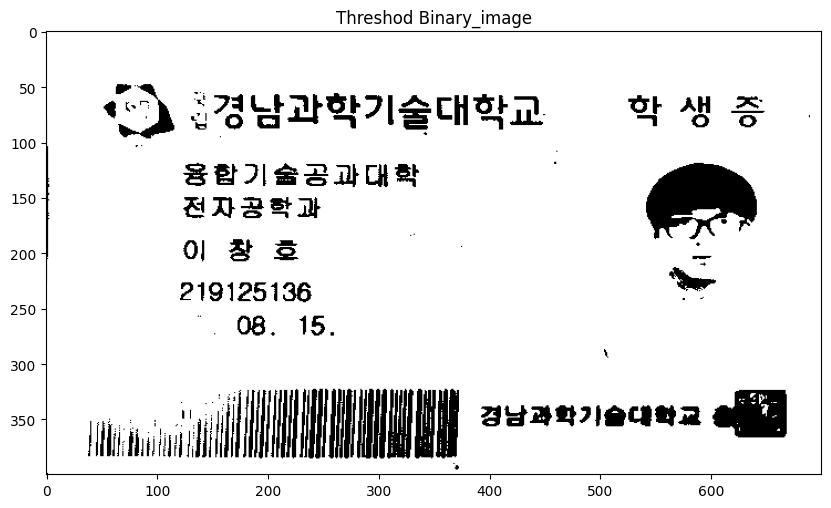

In [5]:
# 127미만의 값 0으로 설정(검은색), 위의 모든 값은 255(흰색)
ret, Binary_image= cv2.threshold(gray_image, 156, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.title("Threshod Binary_image")
plt.imshow(Binary_image)

## 마우스 왼클릭 4번으로 직접 학번 잘라내기

In [27]:
point_list = []

COLOR = (255, 0, 255) # 핑크
THICKNESS = 2
drawing = False # 선을 그릴지 여부

def mouse_handler(event, x, y, flages, param):
    global drawing
    dst_img = Binary_image.copy()
    
    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼 Down
        drawing = True # 선을 그리기 시작
        point_list.append((x,y))
    
    if drawing:
        prev_point = None # 직선의 시작점
        for point in point_list:
            cv2.circle(dst_img, point, 3, COLOR, cv2.FILLED)
            if prev_point:
                cv2.line(dst_img, prev_point, point, COLOR, THICKNESS, cv2.LINE_AA)
            prev_point = point
        
        next_point = (x, y)
        if len(point_list) == 4:
            show_result() # 결과 출력
            next_point = point_list[0] # 첫 번째 클릭한 지점
            
        cv2.line(dst_img, prev_point, next_point, COLOR, THICKNESS, cv2.LINE_AA)

    cv2.imshow('img', dst_img)

def show_result():
    width, height = 700, 400
    
    src = np.float32(point_list)
    dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # Output 4개 지점
    # 좌상, 우상, 우하, 좌하 (시계방향으로 4 지점 정의)

    matrix = cv2.getPerspectiveTransform(src, dst) #Metrix 얻어 옴
    result = cv2.warpPerspective(Binary_image, matrix, (width, height)) # matrix 대로 변환
    cv2.imshow('result', result)
    
cv2.namedWindow('img') # img 란 이름의 윈도우를 먼저 만들어 두는 것. 여기에 마우스 이벤트를 처리하기 위한 핸들러 적용
cv2.setMouseCallback('img', mouse_handler)

cv2.imshow('img', Binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()